In [1]:
import pandas as pd
import fitz
import cv2
from io import BytesIO
from PIL import Image
import base64
from openai import OpenAI
from pydantic import BaseModel
import json
import numpy as np
import traceback
from typing import Optional

import pandas as pd
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Alignment, Border, Side, Font

from blank_functions.forms.form_recognition import FormRecognition
from blank_functions.ui.ui_functions import get_pic_from_pdf, save_to_excel, get_correct_answers, postprocess_raw_output, check_answers, final_styling, extract_text_from_image, transform_json_to_dataframe
from blank_functions.ui.ui_functions import promt

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# no limit columns for pandas
pd.set_option('display.max_columns', None)

In [2]:
parsed_json_temp = {'subject_name': 'МАТЕМАТИКА',
 'participant_code': 1235,
 'version_number': 2,
 'answer_1': -275,
 'answer_2': 37.5,
 'answer_3': 14,
 'answer_4': 3478,
 'answer_5': 24.5,
 'answer_6': 104,
 'answer_7': -3,
 'answer_8': 0.5,
 'answer_9': 17.5,
 'answer_10': -0.75,
 'correction_1': None,
 'correction_2': None,
 'correction_3': None,
 'correction_4': None,
 'correction_5': None,
 'correction_6': 102,
 'correction_7': None,
 'correction_8': -0.5,
 'correction_9': None,
 'correction_10': None}

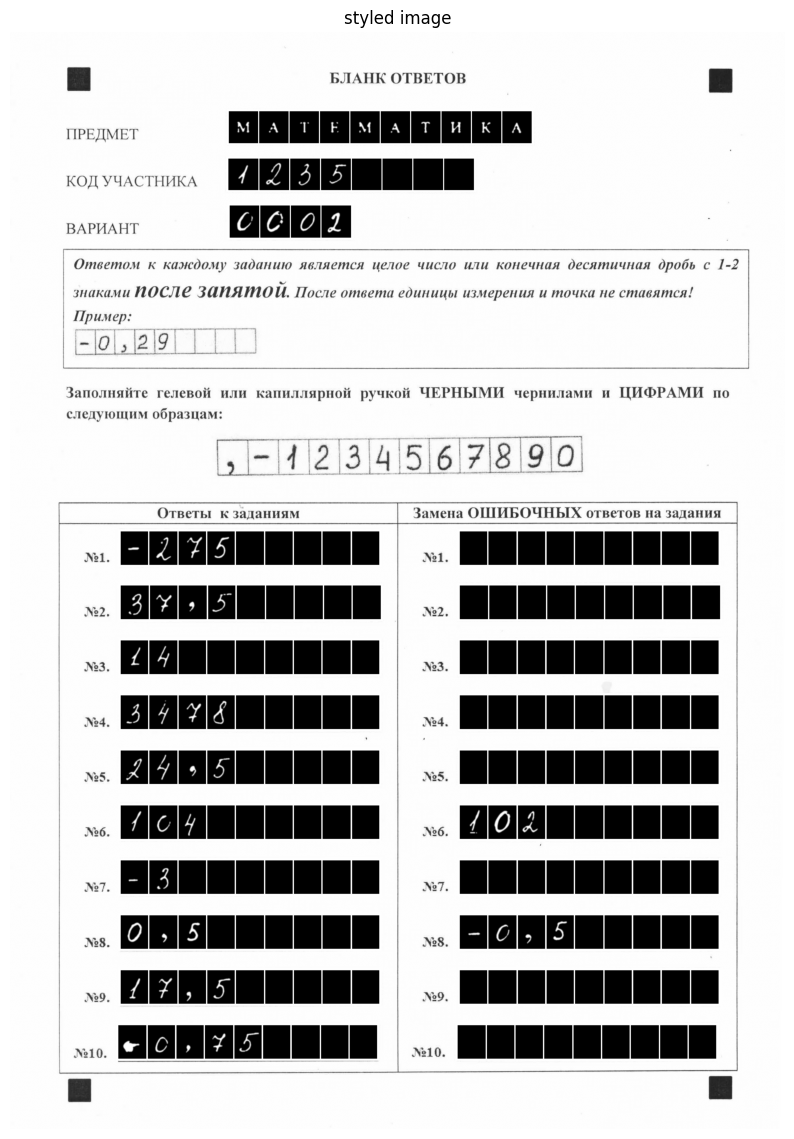

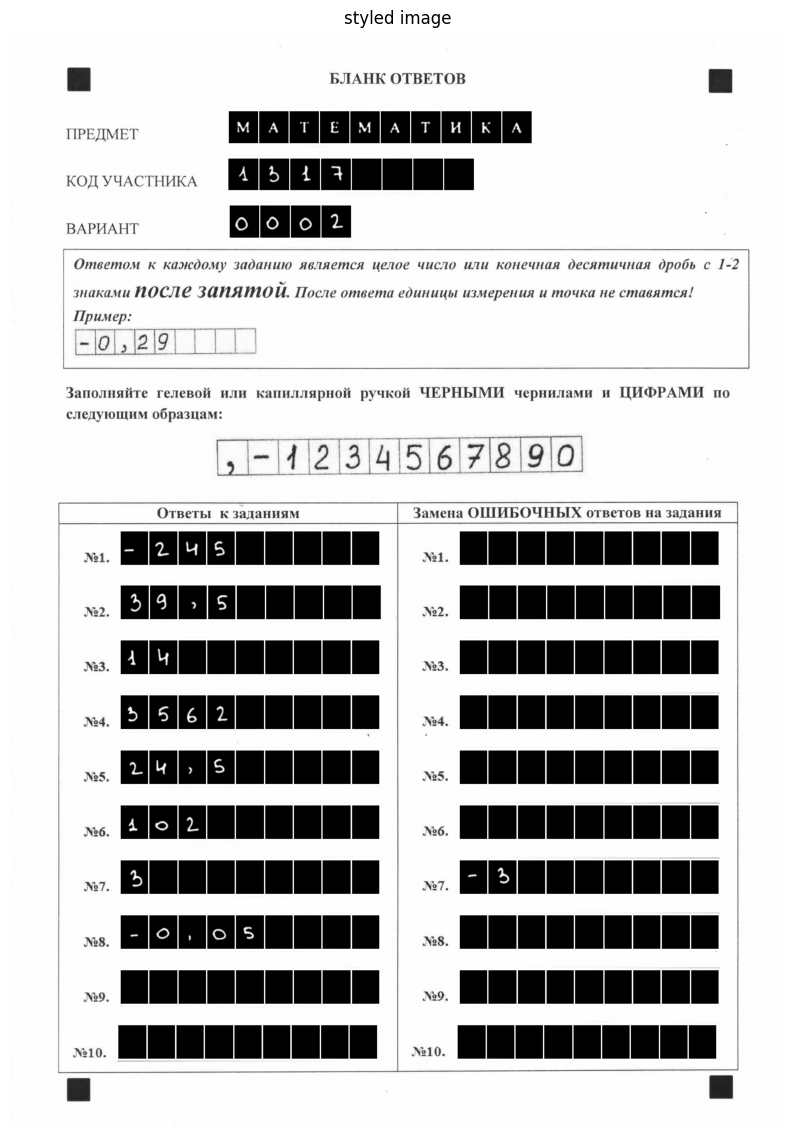

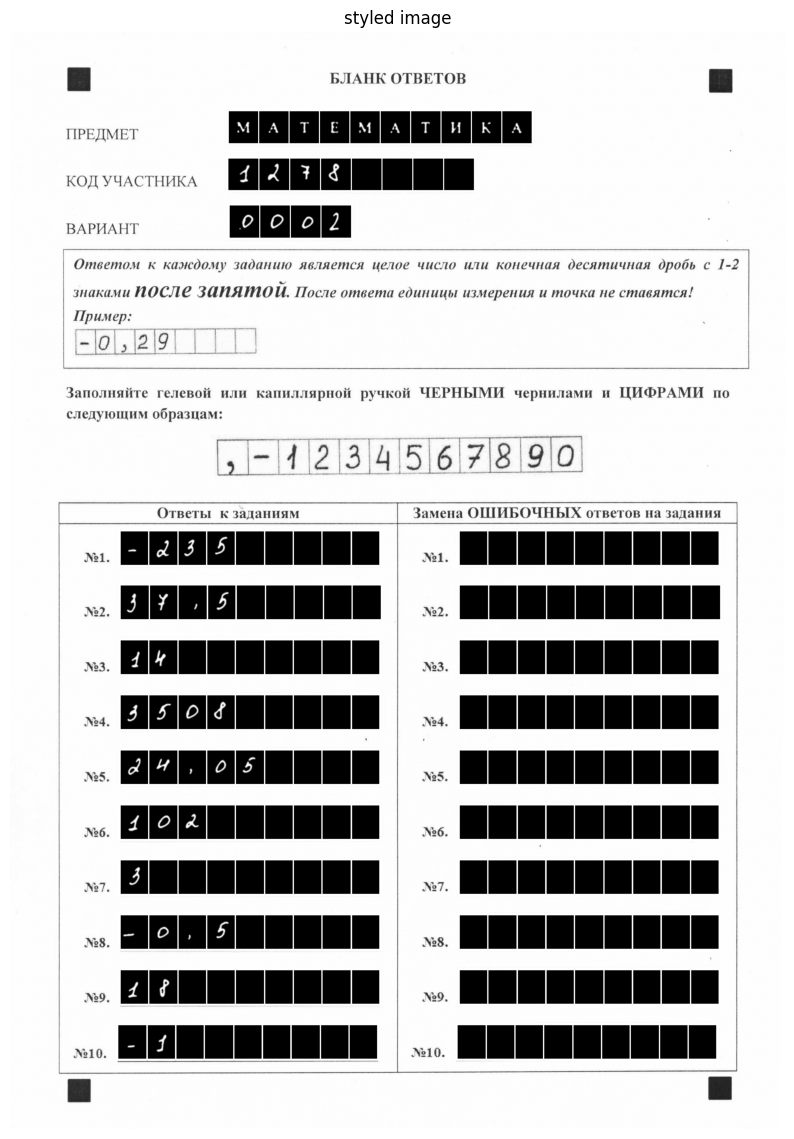

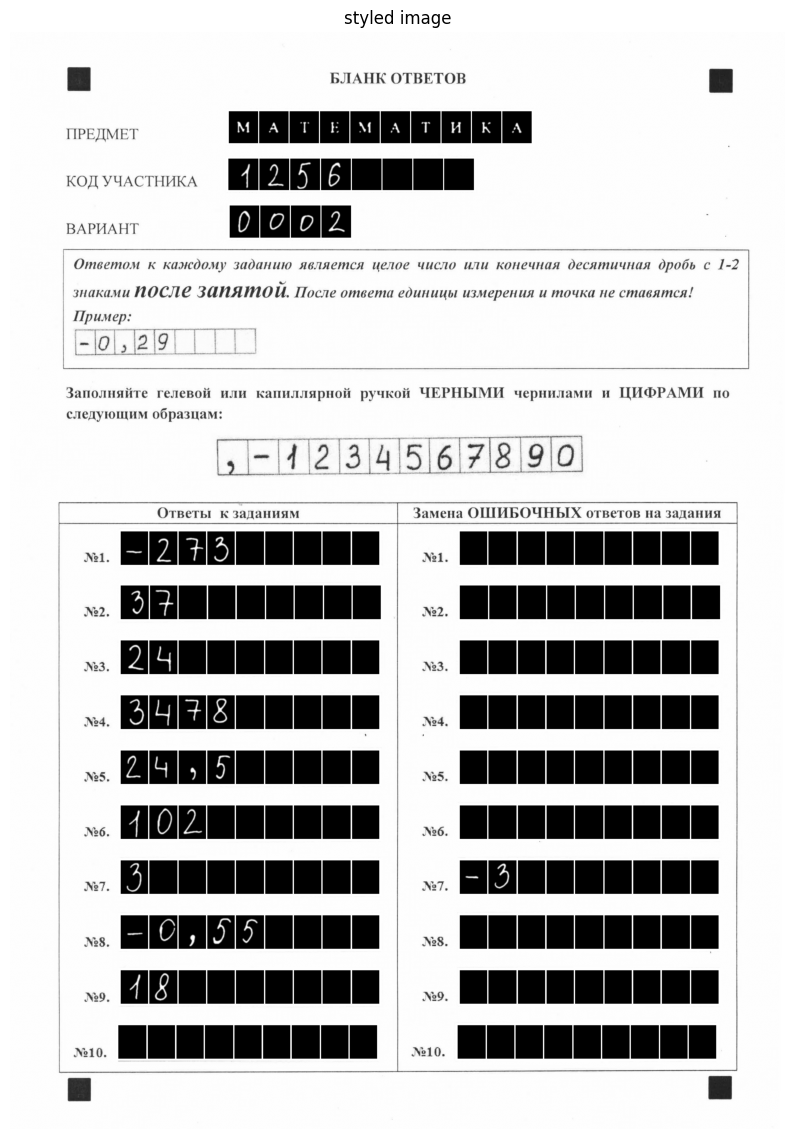

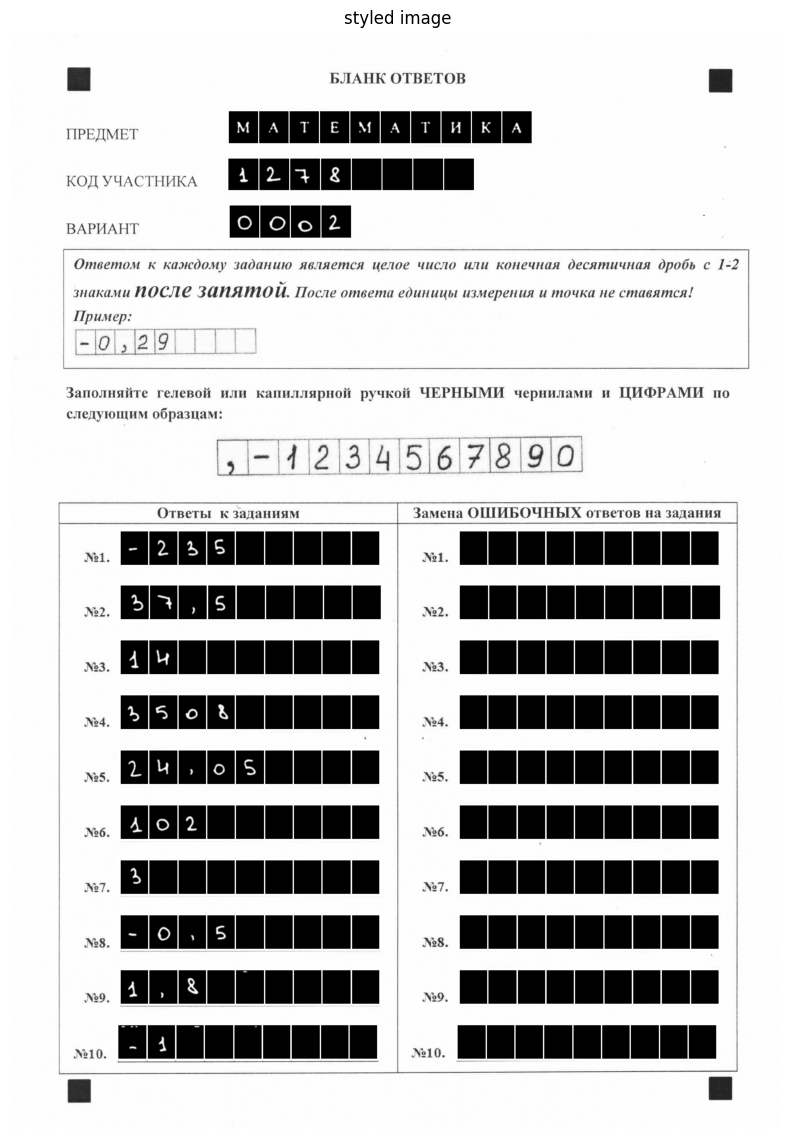

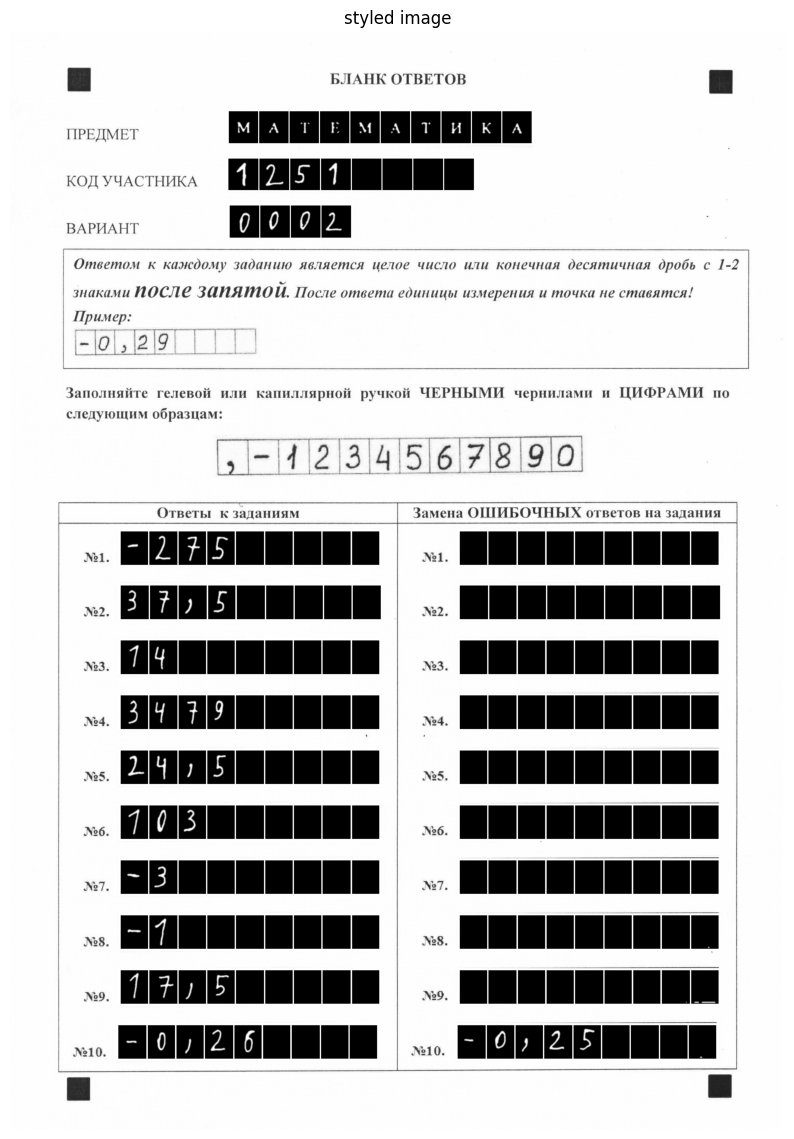

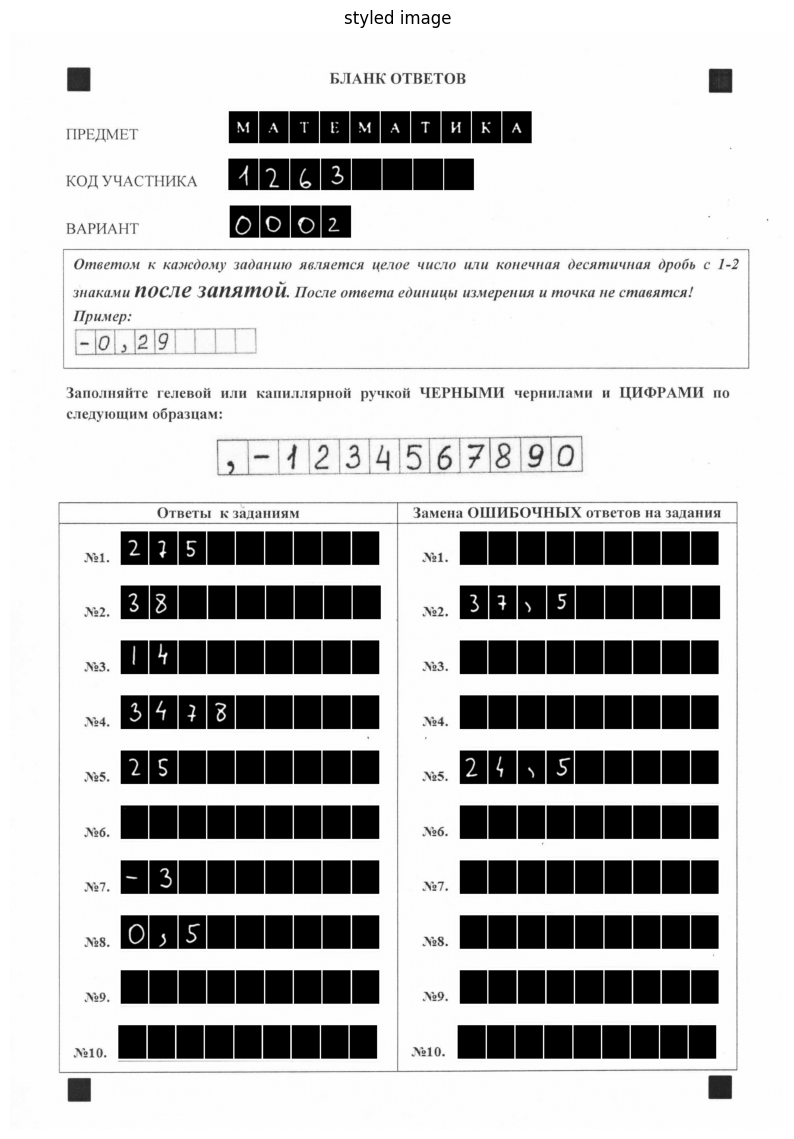

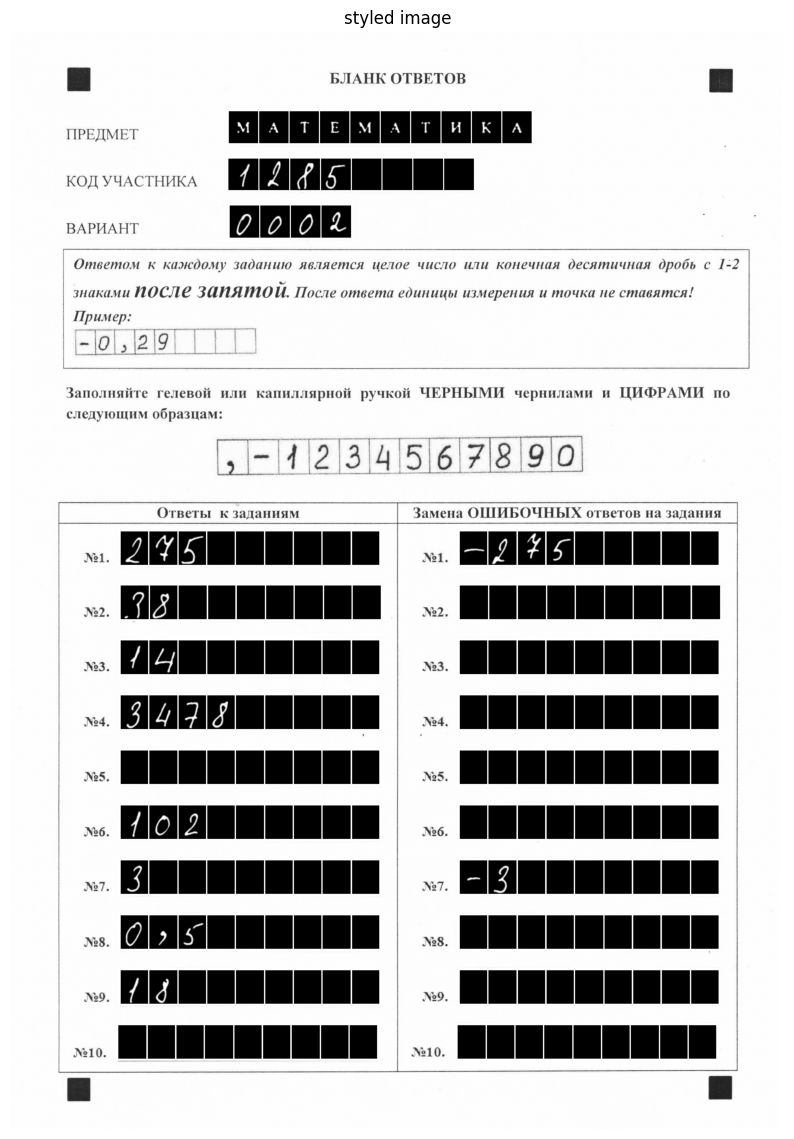

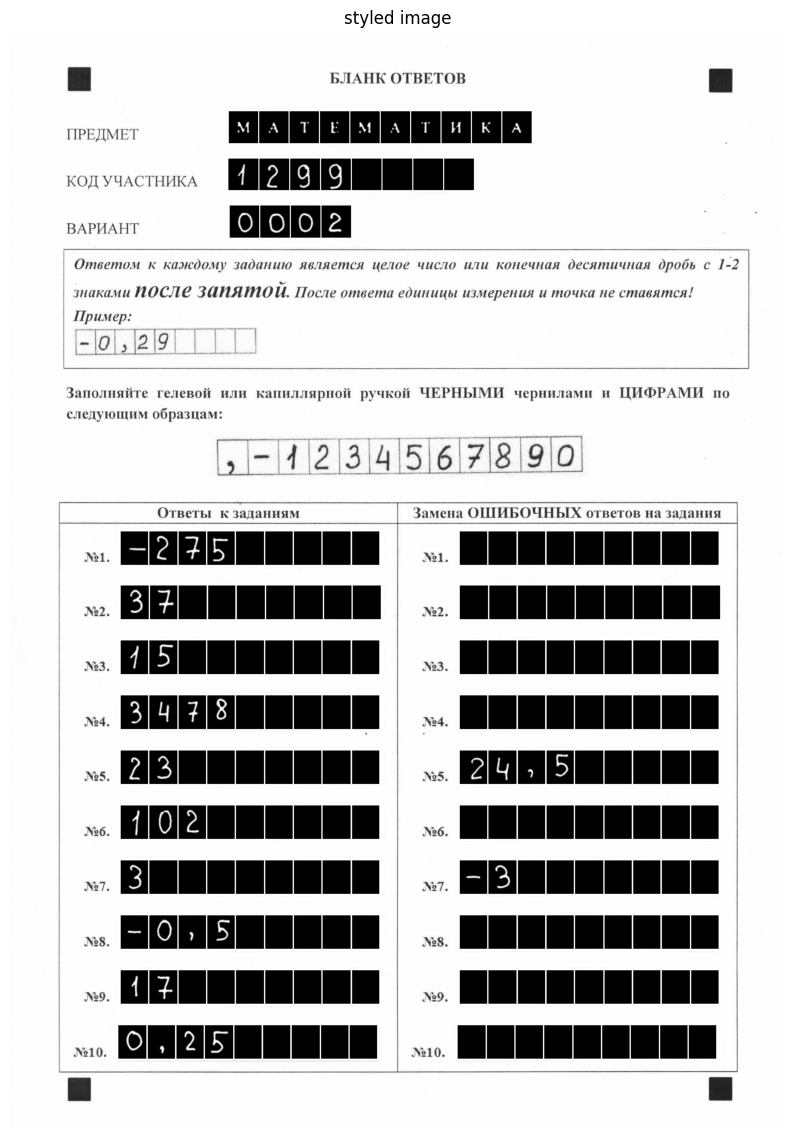

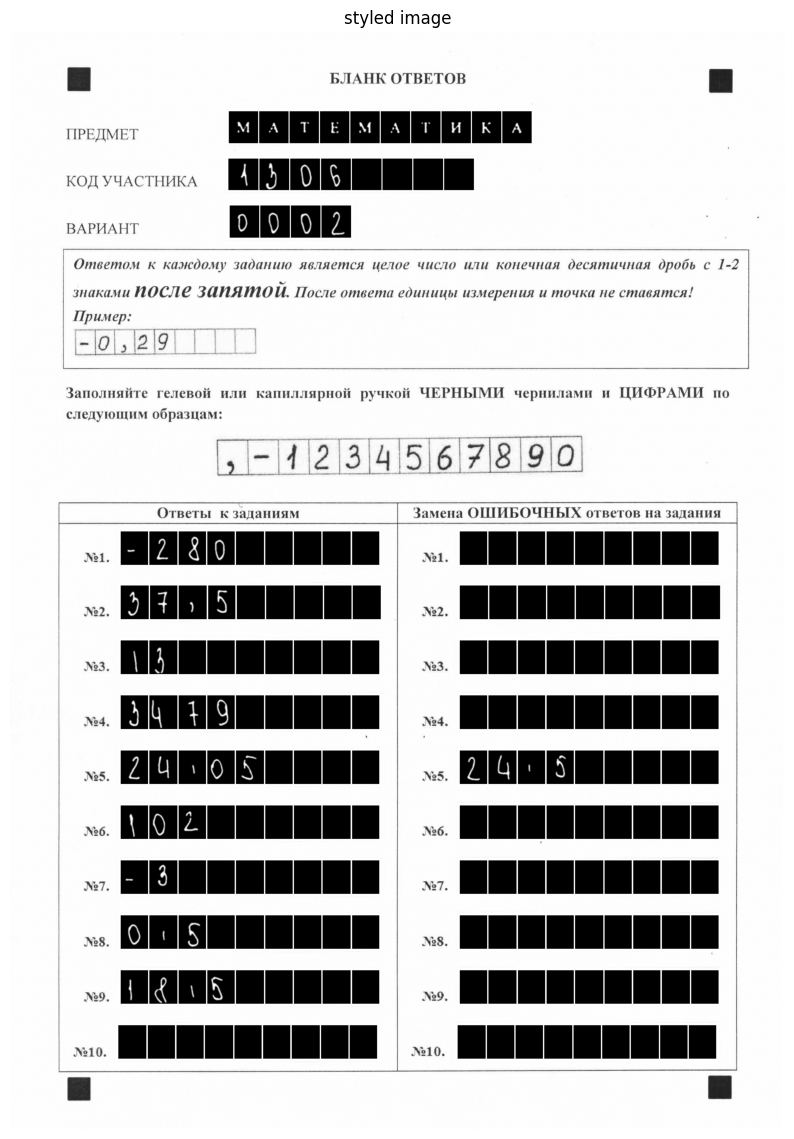

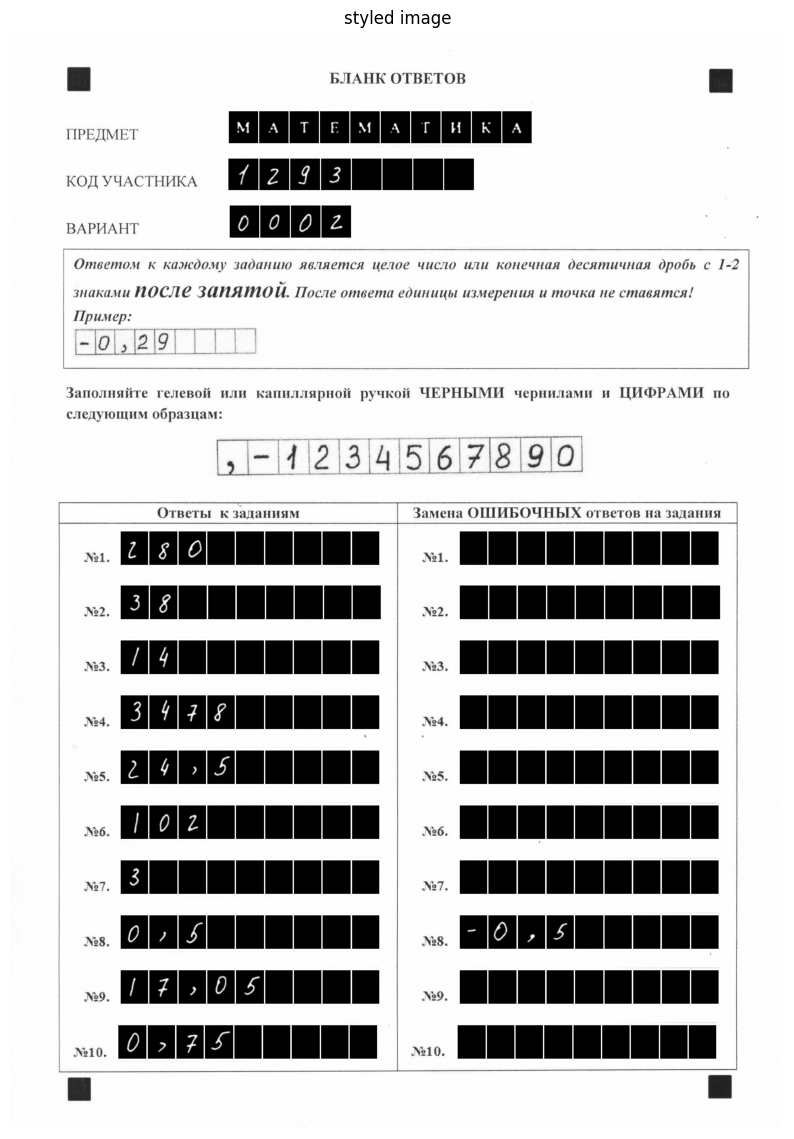

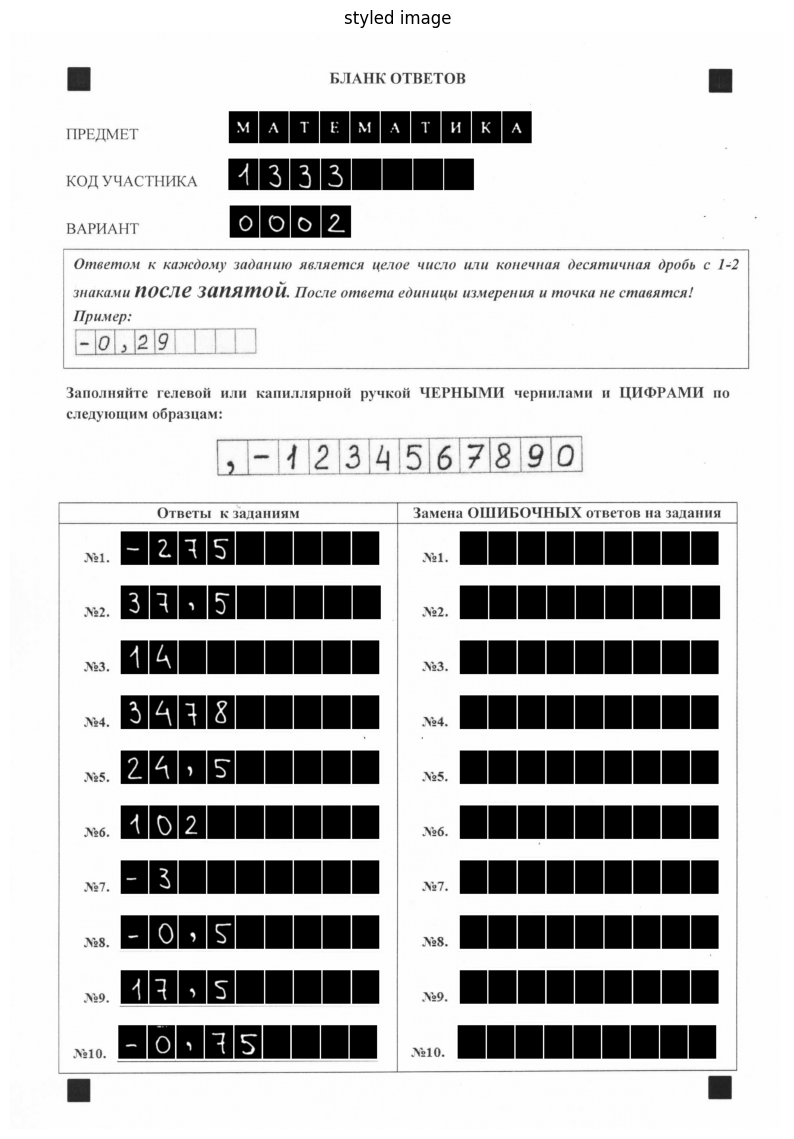

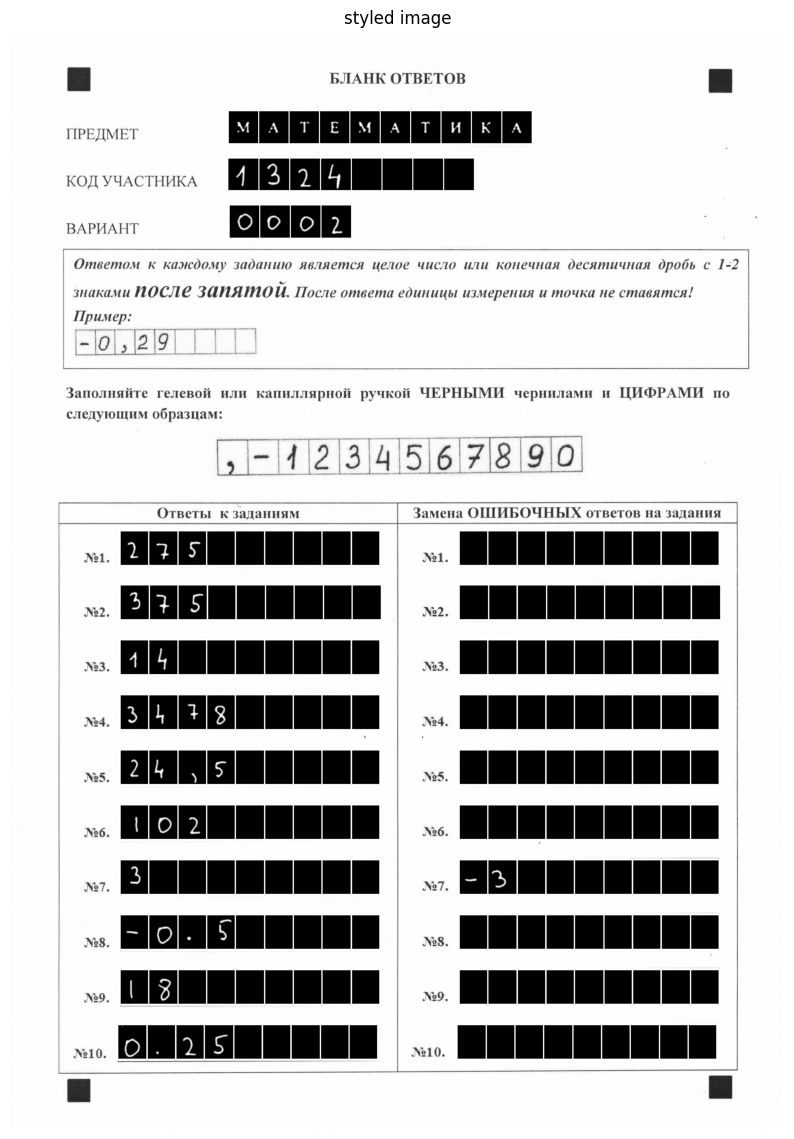

In [3]:
import time

pdf_path = "C:/Users/zamko/Documents/mom_project/repo/data/valid_format/valid_questions.pdf"
answers_path = "C:/Users/zamko/Documents/mom_project/repo/data/answers.xlsx"
template_path = "C:/Users/zamko/Documents/mom_project/repo/data/template_2.jpg"
json_path = "C:/Users/zamko/Documents/mom_project/repo/data/rows_data.json"

pdf_bytes = open(pdf_path, 'rb').read()
pdf_document = fitz.open(stream=pdf_bytes, filetype="pdf")
num_pages = pdf_document.page_count

answers_bytes = open(answers_path, 'rb').read()
answers = pd.read_excel(BytesIO(answers_bytes))

cur_version = 2

df_global = pd.DataFrame()
form_dict = {}
for i in range(0, num_pages):
    cur_pic = get_pic_from_pdf(pdf_bytes, i, zoom=6.0)
    form = FormRecognition(
        image = cur_pic,
        template_path = template_path,
        json_path = json_path,
        answers = answers,
        version = cur_version)
    form = form.run_pipeline()
    df_current = transform_json_to_dataframe(parsed_json_temp, 0, 0)
    df_global = pd.concat([df_global, df_current]).reset_index(drop=True)
    form_dict[i] = form

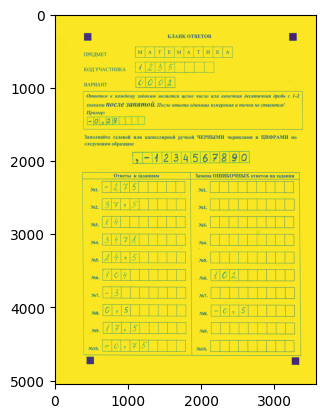

In [4]:
plt.imshow(cur_pic)


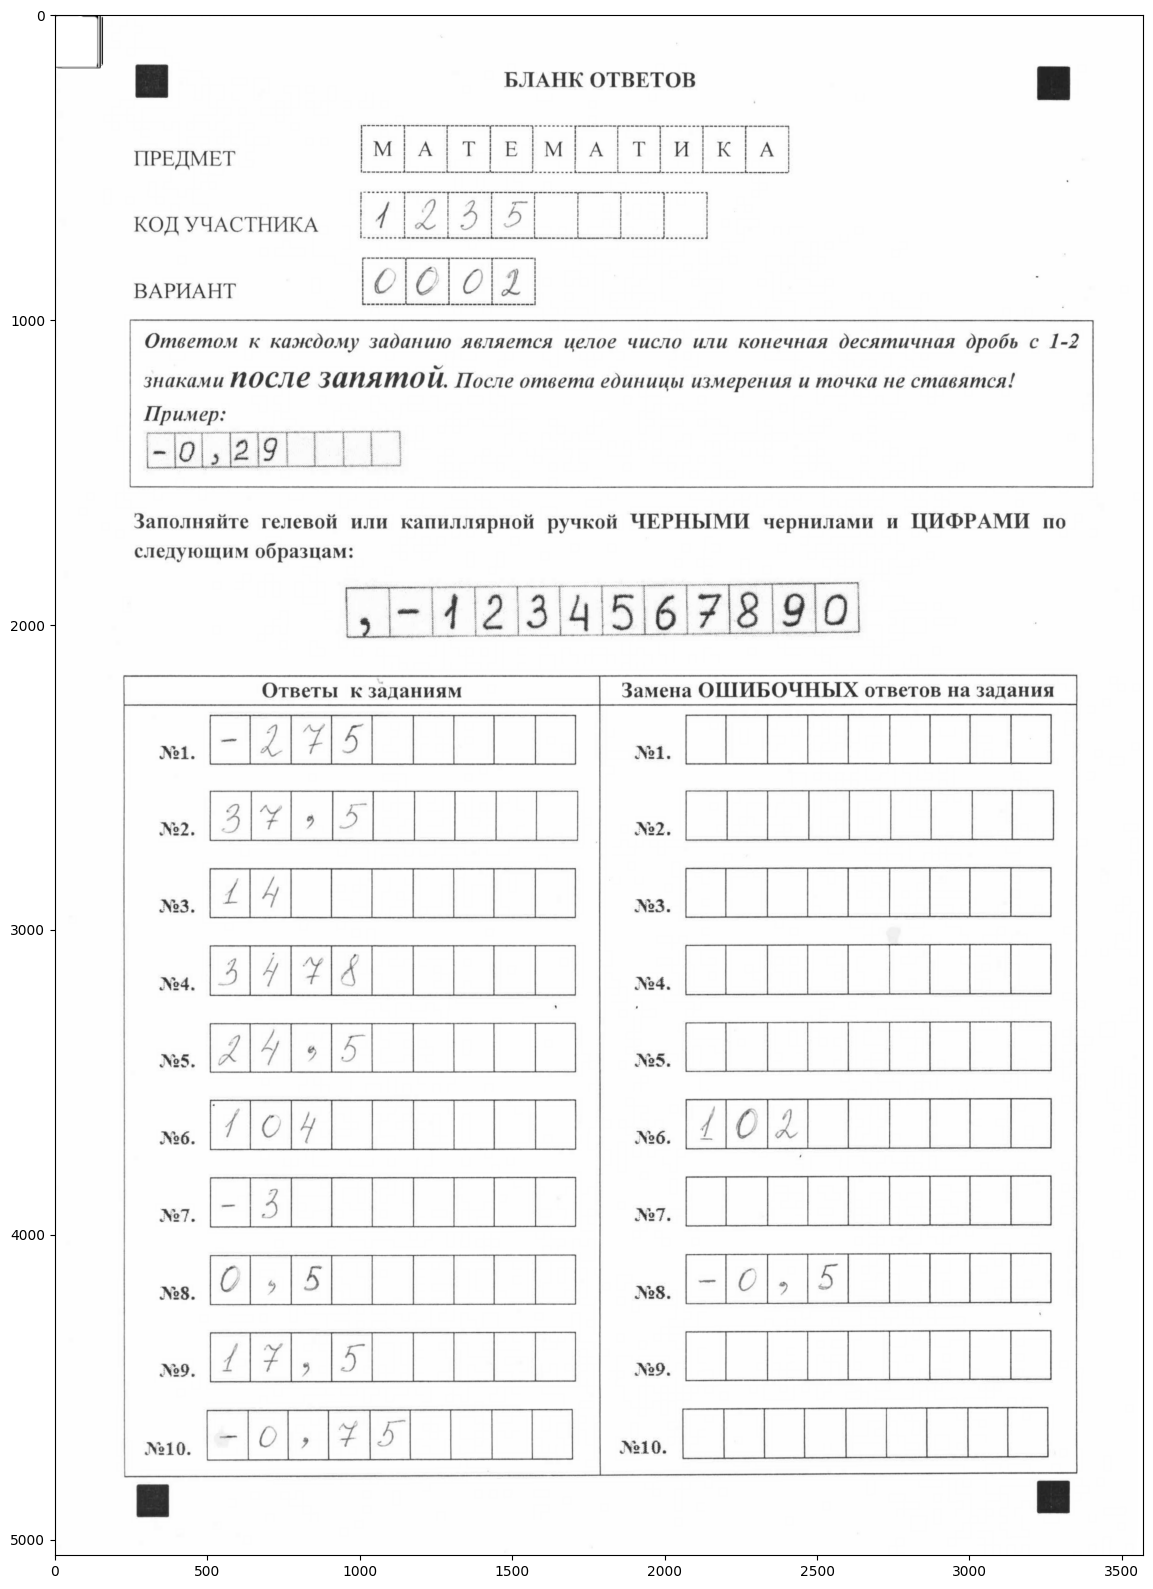

KeyError: 1

<Figure size 4000x2000 with 0 Axes>

In [4]:

for i in range(0, 11):
    # form_dict[i].image = cv2.cvtColor(form_dict[i].image, cv2.COLOR_GRAY2BGR)  
    # for j in range(1, 11):
    #     for answer_name in [f"answer{j}", f"correction{j}"]:
    #         # print(answer_name)
    #         answer_obj = getattr(form_dict[i], answer_name)
    #         for cell in answer_obj.cells:
    #             # print(cell.cell_image.shape)
    #             x, y, w, h = cell.x, cell.y, cell.w, cell.h
    #             # make it yellow      
    #             cv2.rectangle(form_dict[i].image, (x, y), (x + w, y + h), (0, 255, 0), 2)



    plt.figure(figsize=(40, 20))
    plt.imshow(cv2.cvtColor(form_dict[i].image, cv2.COLOR_BGR2RGB))
    plt.show()
